## Adult Income Case Study

General premise of this dataset is to to determine how to predict if someone's income will be above or below 50k

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
sns.set(style='white', context='notebook')

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Cleaning

At first glance the data looks clean since there are no non-null values. However we can spot some '?' values in certain cols just from using .head(). All are either object or int64, no floats. Income is preset into above or below 50k buckets.

#### Missing Data

In [8]:
df[df == '?'] = np.nan

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']

missing.sort_values(by='count',  ascending=False)

,count,%
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


This case study is on easy mode becuase it is all about story telling so...

In [10]:
# use mode to fill in missing info on the above 3 cols with null vals
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
# check to see if all good
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']

missing.sort_values(by='count',  ascending=False)

,count,%
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


#### Duplicates

In [12]:
df.duplicated().sum()

53

In [13]:
df = df.drop_duplicates()

### EDA

According to Aditi Mulye, a fellow kaggler, this data sets, "Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))". For now I will take him at his word and confirm this at a later date.

In [14]:
# Quick look
print(f"Ratio above 50k : {(df['income'] == '>50K').astype('int').sum() / df.shape[0] * 100 :.2f}%")

Ratio above 50k : 23.94%


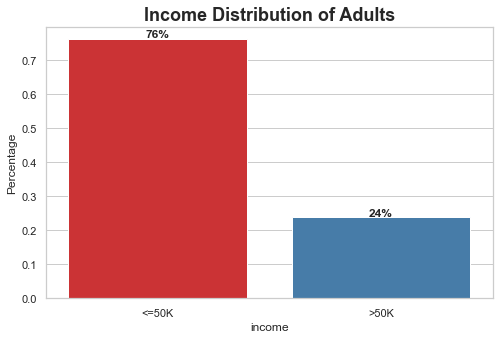

In [129]:
# Visually:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Set1')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center', fontweight='bold')
    
plt.savefig('IncomeDistribution.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Observation: Important faetures are those which are greatly different from this ratio

<Figure size 1152x720 with 0 Axes>

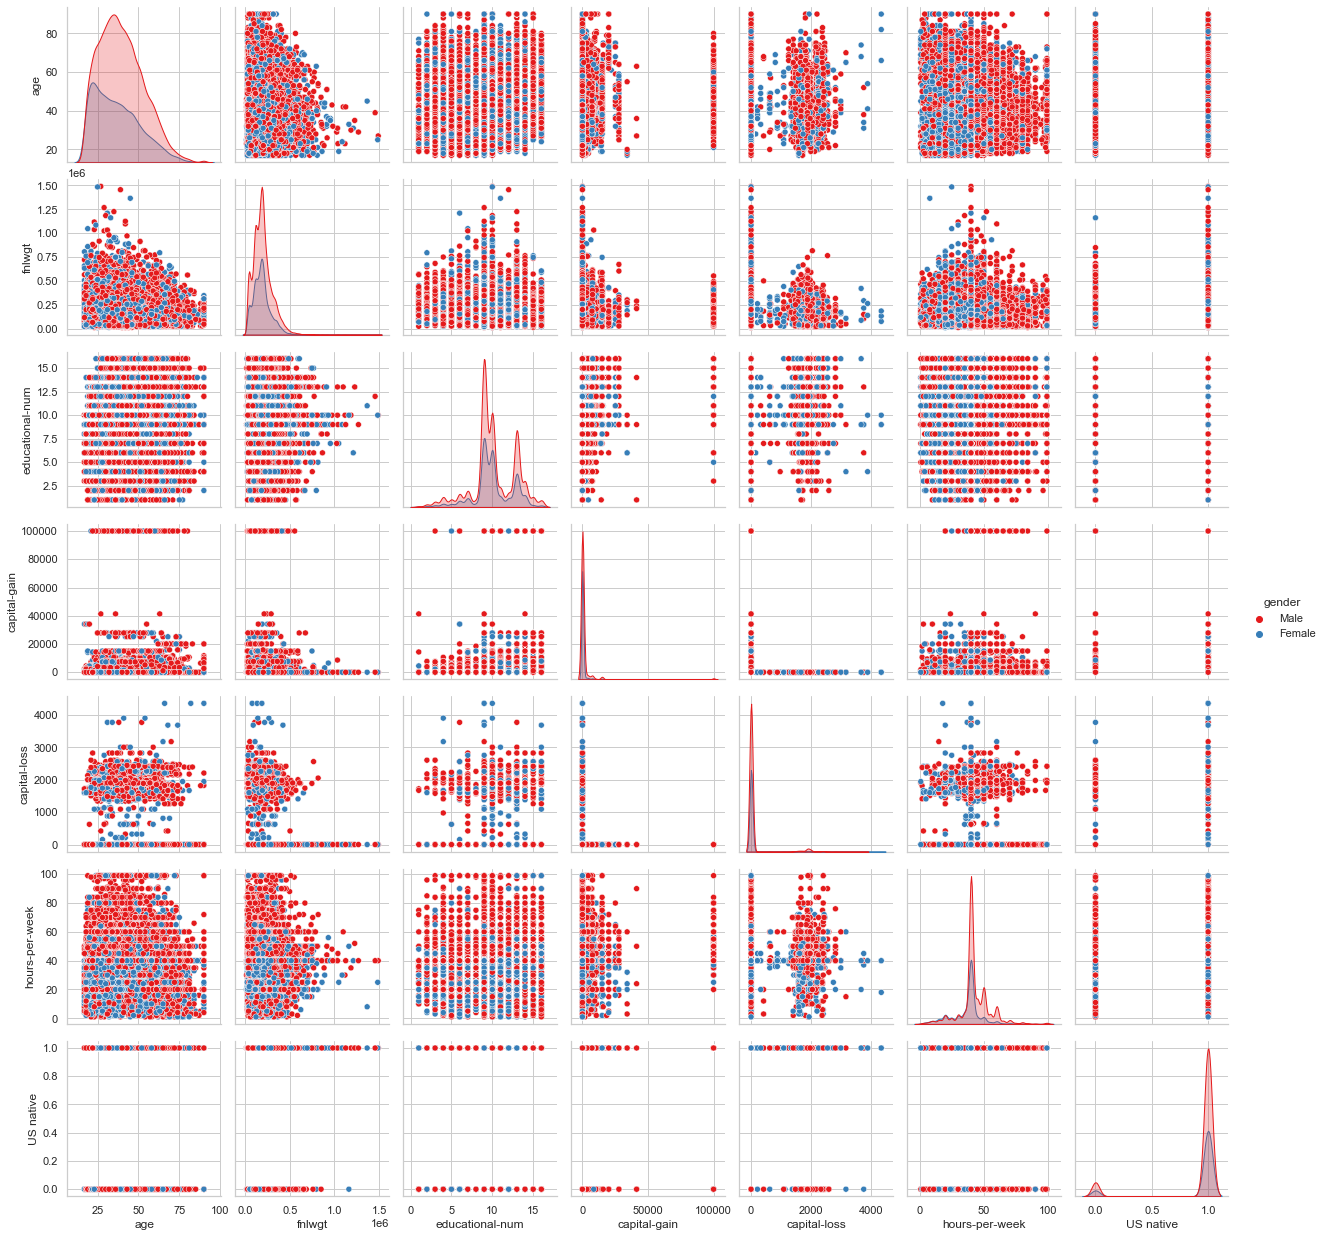

In [101]:
# Quick pairwise
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='gender', palette='Set1')
plt.savefig('pairwise.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

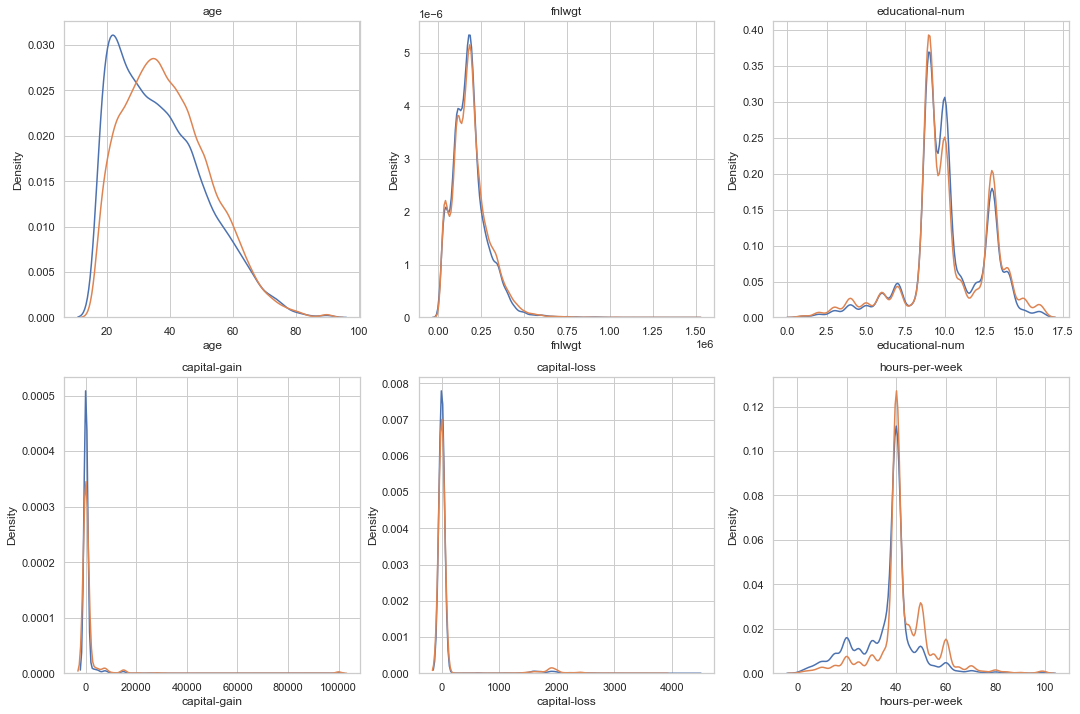

In [102]:
# Narrow parameters to just numerical, Credit to: **pull info
nums = df.select_dtypes(include=['int64']).columns

plt.figure(figsize=(18,12))
plt.subplot(231)

i=0
for c in nums:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(df[df['gender'] == 'Female'][c], palette='Paired')
    sns.kdeplot(df[df['gender'] == 'Male'][c], palette='Paired')
    plt.title(c)
    BuPu_r

plt.savefig('numerical.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

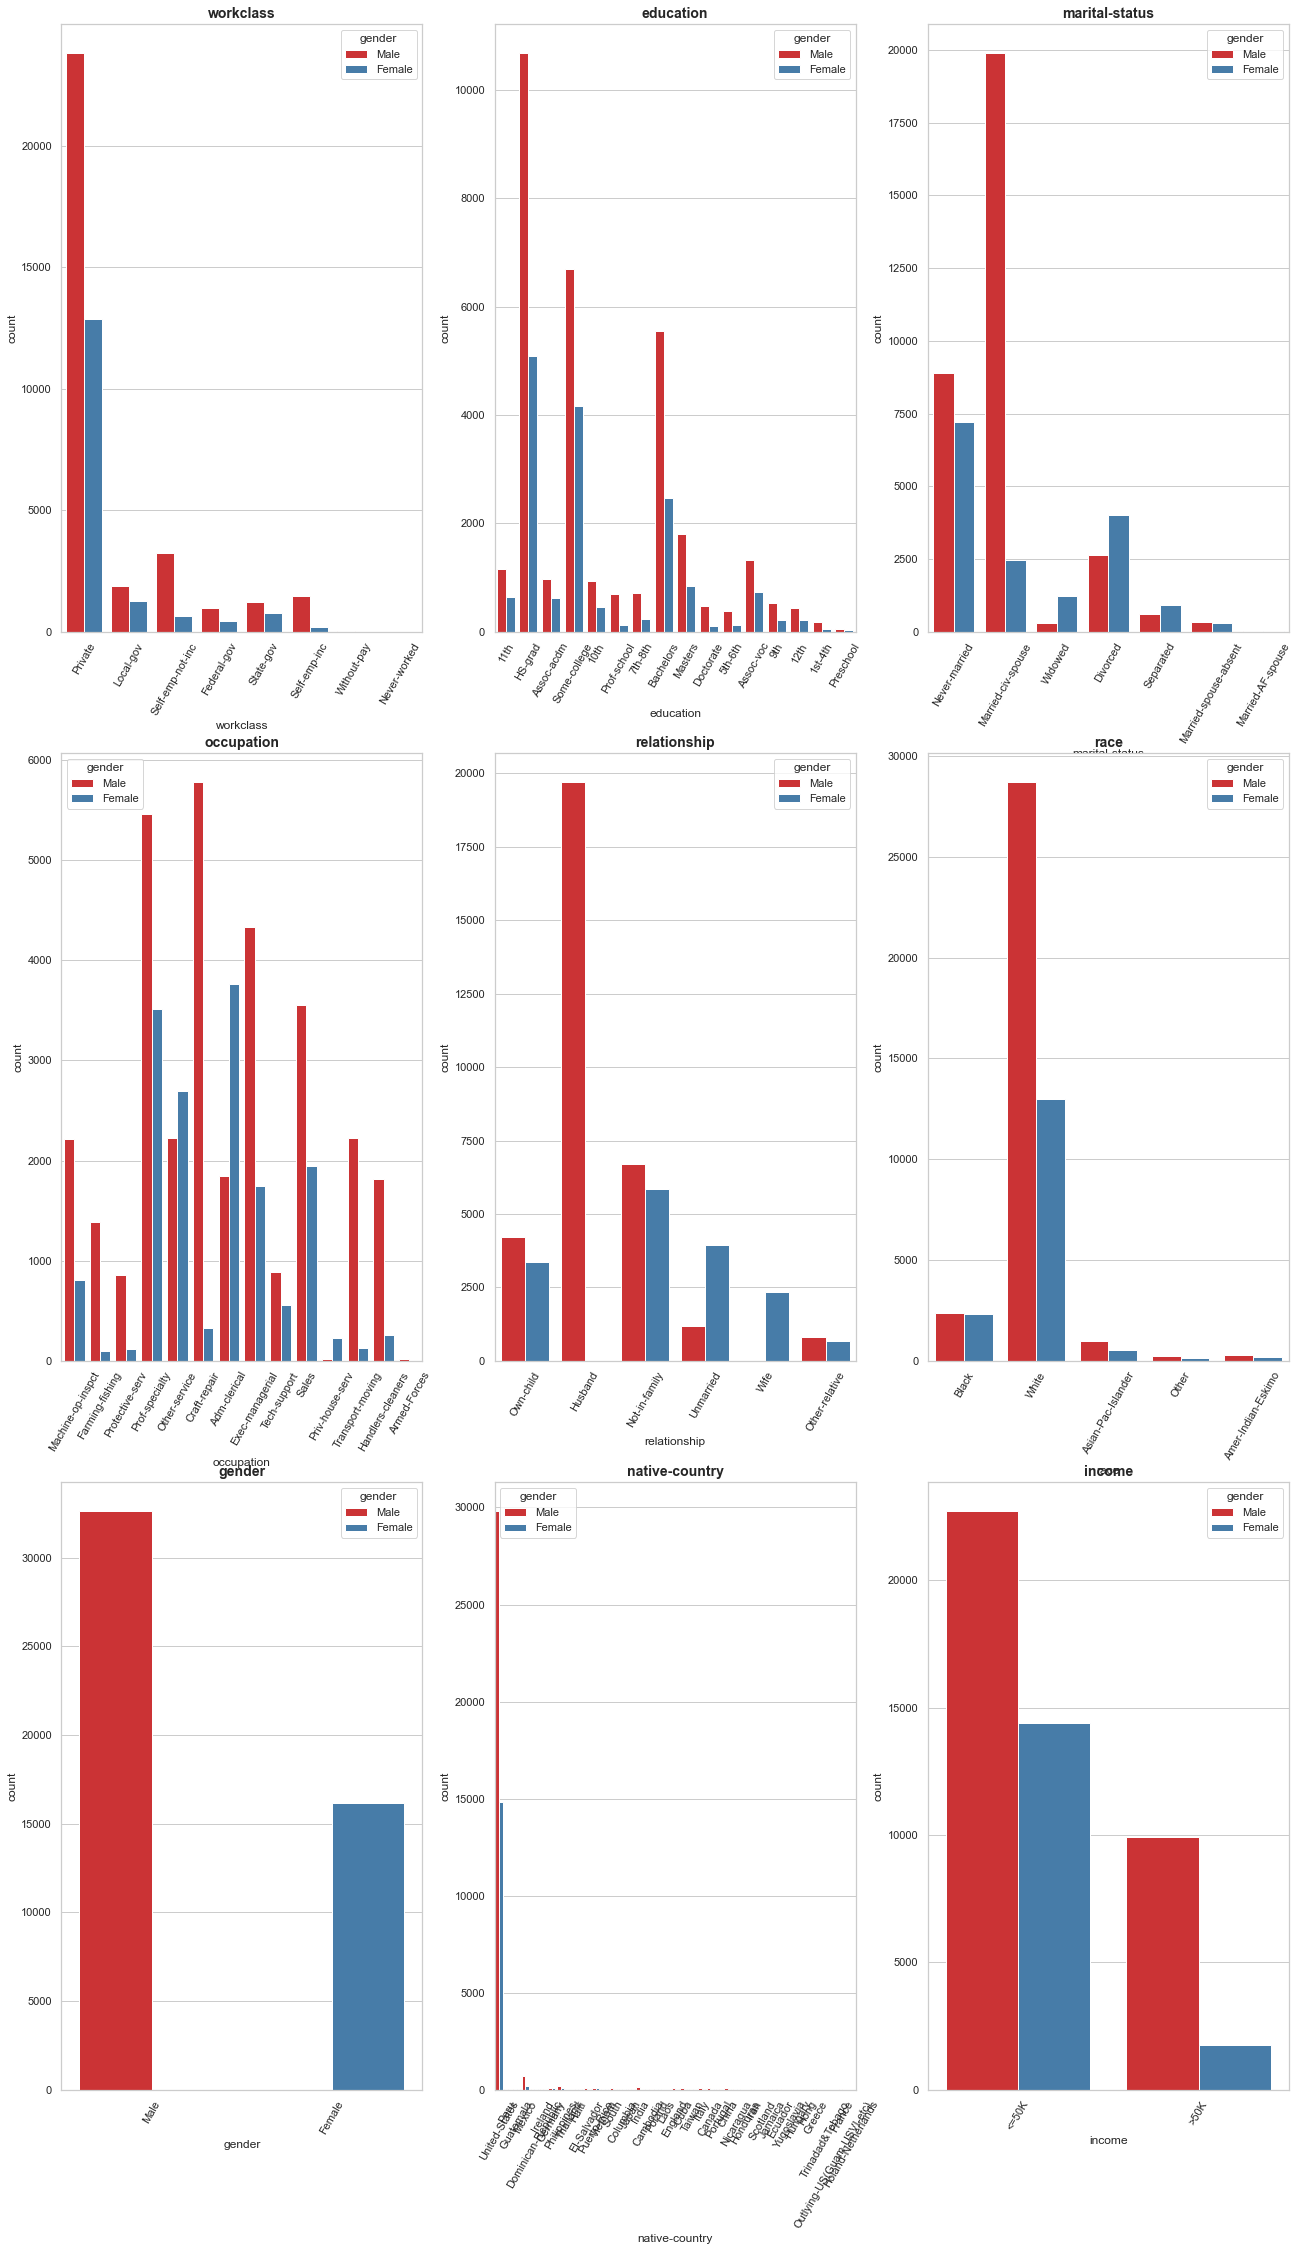

In [140]:
# Same for non-numerical data
cats = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(22,38))
plt.subplot(521)

i=0
for c in cats:
    plt.subplot(3, 3, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='gender', palette='Set1')
    plt.xticks(rotation = 60)
    plt.title(c, fontsize=14, fontweight='bold')

plt.savefig('nonnumerical.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

There are more male earning >50k than female, but at the same time there are also more male earning <50k and even more males recorded in general. The counts need to be normalized.

In [141]:
# female / male
female = (df.gender == 'Female').astype('int').sum()
male = (df.gender == 'Male').astype('int').sum()

# nb of people earning more or less than 50k per gender
male_above = len(df[(df.income == '>50K') & (df.gender == 'Male')])
male_below = len(df[(df.income == '<=50K') & (df.gender == 'Male')])
female_above = len(df[(df.income == '>50K') & (df.gender == 'Female')])
female_below = len(df[(df.income == '<=50K') & (df.gender == 'Female')])

print(f'Male   : {male_above/male*100:.0f}% earn >50K || {male_below/male*100:.0f}% earn <=50K')
print(f'Female : {female_above/female*100:.0f}% earn >50K || {female_below/female*100:.0f}% earn <=50K')

Male   : 30% earn >50K || 70% earn <=50K
Female : 11% earn >50K || 89% earn <=50K


In [107]:
# normalization
male_above /= male 
male_below /= male
female_above /= female
female_below /= female

print(f'Earning > 50K  : {male_above / (male_above + female_above) *100 :.0f}% are Females and {female_above / (male_above + female_above) *100 :.0f}% are Males')
print(f'Earning =< 50K : {male_below / (male_below + female_below) *100 :.0f}% are Females and {female_below / (male_below + female_below) *100 :.0f}% are Males')

Earning > 50K  : 58% are Females and 42% are Males
Earning =< 50K : 28% are Females and 72% are Males


The category of native has a large number of those native to the USA. We need a cleaner look at this:

C:\Users\Xzenc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


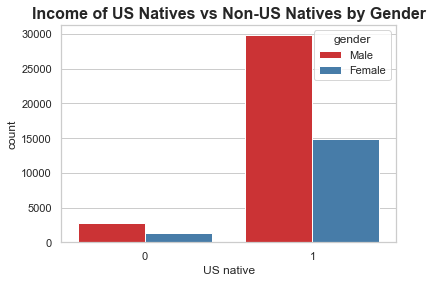

In [130]:
df['US native'] = (df['native-country'] == 'United-States').astype('int')
plt.figure(figsize=(6,4))
sns.countplot(x='US native', data=df, hue='gender', palette='Set1')
plt.title('Income of US Natives vs Non-US Natives by Gender', fontsize=16, fontweight='bold')
plt.savefig('incomenativevnonnativegender.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

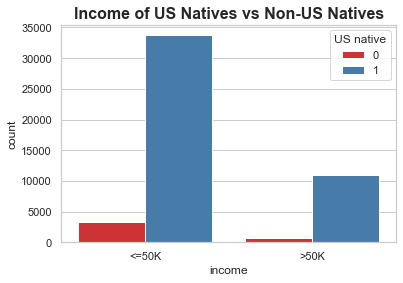

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df, hue='US native', palette='Set1')
plt.title('Income of US Natives vs Non-US Natives', fontsize=16, fontweight='bold')
plt.savefig('incomenativevnonative.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [119]:
# people earning more or less than 50k per origin
native_above = len(df[(df.income == '>50K') & (df['US native'] == 1)])
native_below = len(df[(df.income == '<=50K') & (df['US native'] == 1)])
foreign_above = len(df[(df.income == '>50K') & (df['US native'] == 0)])
foreign_below = len(df[(df.income == '<=50K') & (df['US native'] == 0)])

native = (df['US native'] == 1).astype('int').sum()
foreign = df.shape[0] - nb_native

print(f'Among natives    : {native_above/native*100:.0f}% earn >50K // {native_below/native*100:.0f}% earn <=50K')
print(f'Among foreigners : {foreign_above/foreign*100:.0f}% earn >50K // {foreign_below/foreign*100:.0f}% earn <=50K')

Among natives    : 24% earn >50K // 76% earn <=50K
Among foreigners : 19% earn >50K // 81% earn <=50K


In [120]:
# normalization
native_above /= native
native_below /= native
foreign_above /= foreign
foreign_below /= foreign

print(f'Earning > 50K  : {native_above/(native_above + foreign_above) *100 :.0f}% are natives || {foreign_above / (native_above + foreign_above) *100 :.0f}% are foreigners')
print(f'Earning =< 50K : {native_below/(native_below + foreign_below) *100 :.0f}% are natives || {foreign_below / (native_below + foreign_below) *100 :.0f}% are foreigners')

Earning > 50K  : 57% are natives || 43% are foreigners
Earning =< 50K : 48% are natives || 52% are foreigners


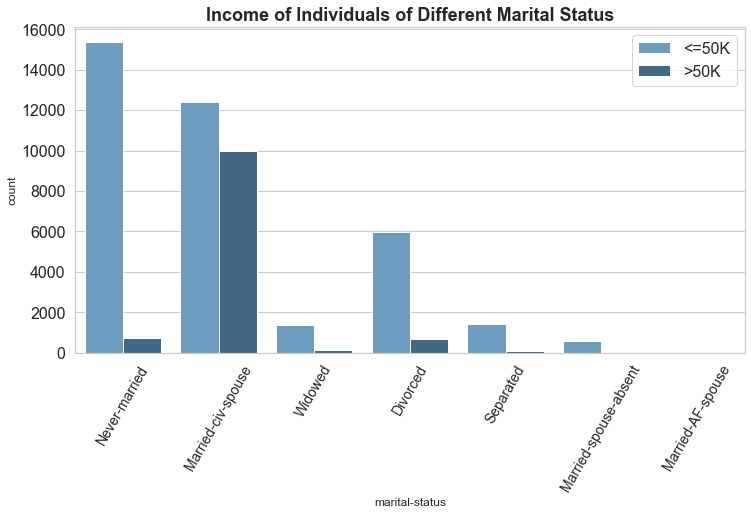

In [121]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['marital-status'], data=df,  hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14,rotation = 60)
plt.yticks(fontsize=16)
plt.savefig('maritalstatus.png', dpi=300, bbox_inches='tight', transparent=True)
plt.legend(fontsize=16)

Clearly those married with a spouse have a strong tendency to have a >50k income

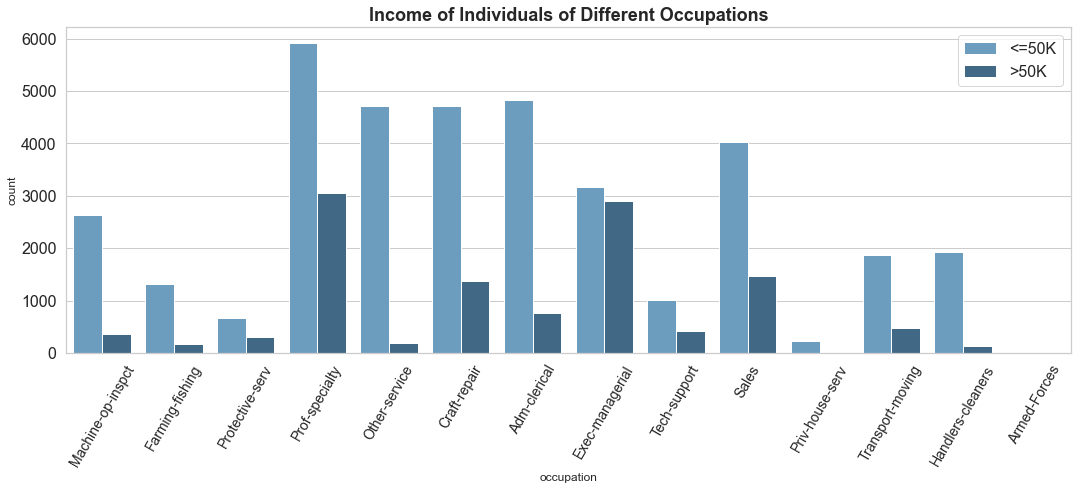

In [122]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['occupation'], data=df, hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14,rotation = 60)
plt.yticks(fontsize=16)
plt.savefig('occupation.png', dpi=300, bbox_inches='tight', transparent=True)
plt.legend(fontsize=16)

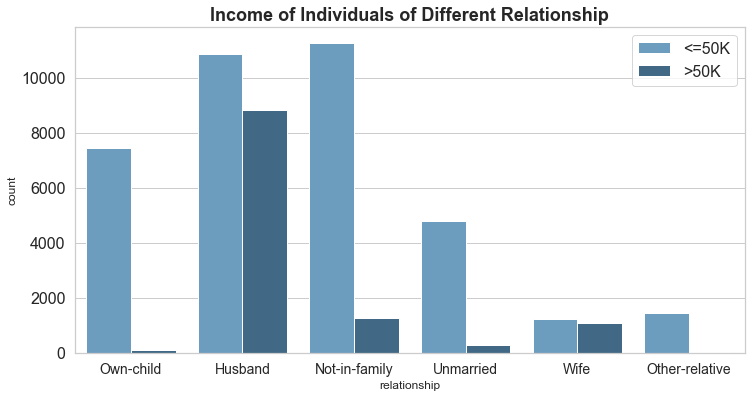

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['relationship'], data=df, hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.savefig('relationship.png', dpi=300, bbox_inches='tight', transparent=True)
plt.legend(fontsize=16)

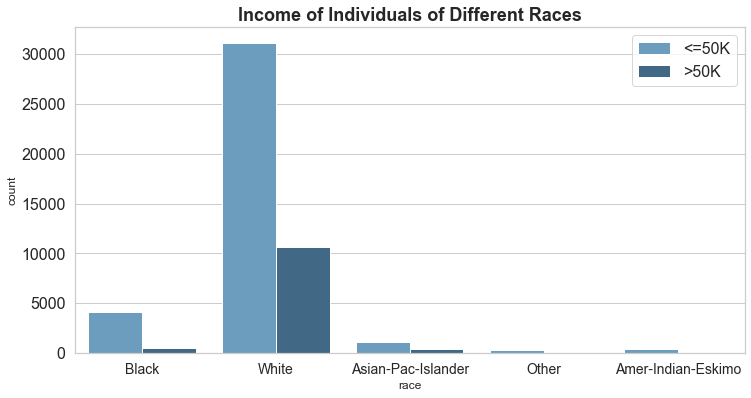

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['race'], data=df, hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.savefig('race.png', dpi=300, bbox_inches='tight', transparent=True)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


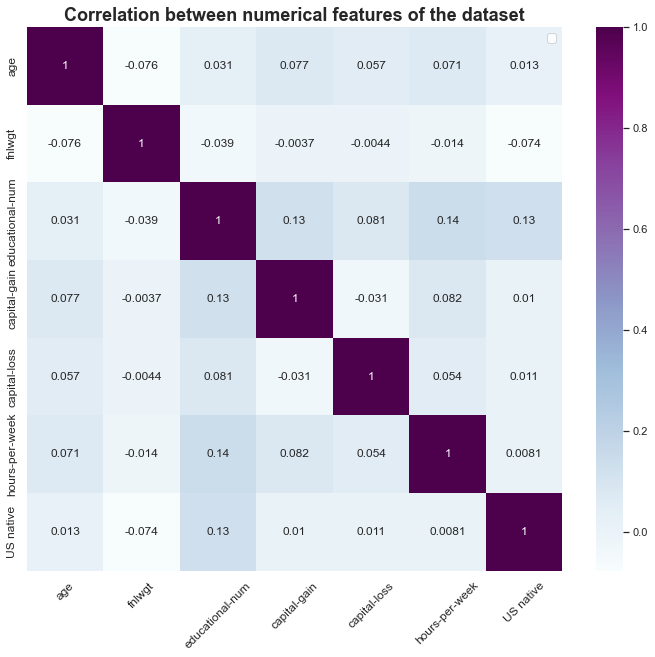

In [143]:
plt.figure(figsize = (12,10))
plt.title("Correlation between numerical features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'BuPu', annot = True)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12, rotation = 90)
plt.savefig('corr.png', dpi=300, bbox_inches='tight', transparent=True)
plt.legend(fontsize=12)